# Introduction

*1. Problem Statement*



**Objective of the study :**

---


 We aim to develop a data-driven approach to understand employee attrition at Acme Corporation, a leading tech company, and predict which employees are at high risk of leaving.

**Business Context:**

---



Employee attrition presents a major challenge for Acme Corporation, breaking team unity and impacting the company's ability to sustain consistent project results. It can lead to significant expenses for hiring and training new employees, alongside the loss of crucial institutional knowledge and expertise. These issues together reduce productivity and obstruct the company's growth.

**Specific Goals:**

---



Our goal for this study will be to :
- Identify key factors influencing employee attrition at Acme Corporation.
- Develop a model to predict the likelihood of employee departure.


2. Hypothesis Generation

**Initial Hypotheses:**

---



- Employees with lower job satisfaction are more likely to leave the company.
- Employees who haven't been promoted recently might be more susceptible to outside opportunities.
- Employees with higher levels of overtime are more likely to leave due to burnout.
- Younger employees are at higher risk of leaving the company.
- Employees with longer commutes might experience higher attrition rates.
- Employees with a low work-life imbalance.
- Employees with low payrole

**Potential Factors:**

---



- Demographics: Age, gender, education level, marital status, etc.
- Job Satisfaction: Satisfaction with work, environment, relationships, etc.
- Work Environment: Work-life balance, training opportunities, travel frequency, etc.
- Performance Metrics: Performance ratings, overtime hours, etc.
- Service: Years with the company, years in current role, etc.

# Data Preprocessing

## Data exploration

In [241]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import mstats
import matplotlib.pyplot as plt

importing the data :

In [242]:
data = pd.read_csv('data.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [243]:
unique_counts = data['Attrition'].value_counts()
print("Unique value counts in 'Attrition' column:")
print(unique_counts)

Unique value counts in 'Attrition' column:
Attrition
No     1233
Yes     237
Name: count, dtype: int64


first glance of the data:

In [244]:
print("First few rows of the data:")
print(data.head())

First few rows of the data:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours

In [245]:
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel           

In [246]:
print("Summary statistics of the data:")
print(data.describe())

Summary statistics of the data:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
s

In [247]:
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInC

-> we have no missing data!

In [248]:
#Descovering the duplicated values of the dataset
print('The duplicated values of data')
print(data.duplicated().sum())

The duplicated values of data
0


-> we have no duplicated data!

In [249]:
#Descovering the unique values of the dataset
print('The unique values of data')
print(data.nunique())

The unique values of data
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLast

!! Several variables in the dataset exhibit a single unique value. These variables, including **EmployeeCount, Over18, and StandardHours**, have consistent values across all observations, suggesting they may not contribute meaningful variability to the analysis. These factors could be considered constant or invariant throughout the dataset.

##Data Cleaning

###Dropping irrelevant columns

In [250]:
cols_to_delete = ['EmployeeCount', 'Over18', 'StandardHours']
for col in cols_to_delete:
  if col in data.columns:
    data = data.drop(col, axis=1)

We removed columns that have the same value across all rows in the dataset.

###Handle Missing Data

In [251]:
from sklearn.impute import SimpleImputer


numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Selecting numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Impute missing values for numerical columns
data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])

# Impute missing values for categorical columns
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

# Verify that there are no missing values left
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


( but we already know that we have no missing data )

###Remove Duplicates

In [252]:
# Removing all duplicate rows
data_no_duplicates = data.drop_duplicates()

(but we have no duplicates in the data )

###Address Outliers

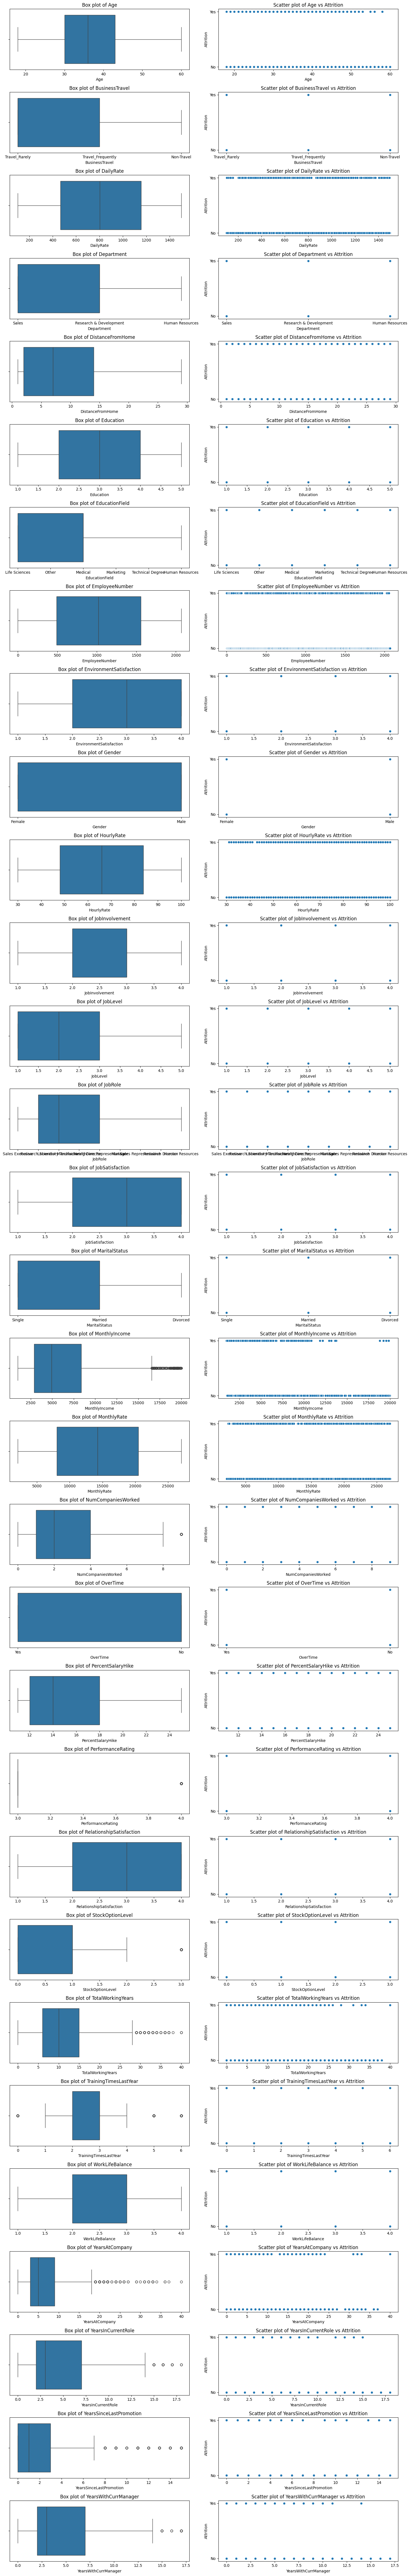

In [253]:
columns_to_plot = [col for col in data.columns if col != 'Attrition']

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=2, figsize=(15, 3*len(columns_to_plot)))
fig.subplots_adjust(hspace=1)


for i, col in enumerate(columns_to_plot):
    # Box plot
    sns.boxplot(x=data[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'Box plot of {col}')
    axes[i, 0].set_xlabel(col)

    # Scatter plot
    sns.scatterplot(x=data[col], y=data['Attrition'], ax=axes[i, 1])
    axes[i, 1].set_title(f'Scatter plot of {col} vs Attrition')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Attrition')

plt.tight_layout()
plt.show()

we can detect the existance of outliers from the box plot. now we will deal with these outliers using 2 methods :
- Winsorizing is a technique used in statistics to limit the impact of outliers by setting extreme values to a specified percentile of the data.
- Removing outliers improves data reliability by excluding extreme data points, ensuring more accurate analyses. (IQR)

In [254]:
def winsorize_column(column, limits=[0.05, 0.05]):
    return mstats.winsorize(column, limits=limits)

# Columns to Winsorize
columns_to_winsorize = ['MonthlyIncome','PerformanceRating', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# apllying Winsorizing to the specified columns
for col in columns_to_winsorize:
    data[col] = winsorize_column(data[col])

# function to removing outliers using IQR
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[((df[columns] >= lower_bound) & (df[columns] <= upper_bound)).all(axis=1)]

# Numerical columns (not in the winsorize list)
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
columns_to_clean = [col for col in numerical_columns if col not in columns_to_winsorize]

# removing outliers using IQR from the rest of the columns
data_cleaned = remove_outliers_iqr(data, columns_to_clean)

# displaying results
num_rows = data_cleaned.shape[0]
print(f"Number of rows in the  dataset: {data.shape[0]}")
print(f"Number of rows in the cleaned dataset: {num_rows}")
data = data_cleaned

Number of rows in the  dataset: 1470
Number of rows in the cleaned dataset: 1117


## Data Transformation

###Let's see if we can create some new interesting features

In [255]:
#Age
bins_age = [0, 20, 30, 40, 70]
labels_age = ['<20', '20-29', '30-39', '40-71']
data['Age'] = pd.cut(data['Age'], bins=bins_age, labels=labels_age, right=False)

#Distance From Home
bins_distance = [0, 10, 15, 20, 30]
labels_distance = ['Very Close', 'Close', 'Moderate', 'Far']
data['DistanceFromHome'] = pd.cut(data['DistanceFromHome'], bins=bins_distance, labels=labels_distance, right=False)

print(data)

        Age Attrition     BusinessTravel  DailyRate              Department  \
1     40-71        No  Travel_Frequently      279.0  Research & Development   
2     30-39       Yes      Travel_Rarely     1373.0  Research & Development   
3     30-39        No  Travel_Frequently     1392.0  Research & Development   
5     30-39        No  Travel_Frequently     1005.0  Research & Development   
7     30-39        No      Travel_Rarely     1358.0  Research & Development   
...     ...       ...                ...        ...                     ...   
1463  30-39        No         Non-Travel      325.0  Research & Development   
1464  20-29        No      Travel_Rarely     1167.0                   Sales   
1465  30-39        No  Travel_Frequently      884.0  Research & Development   
1468  40-71        No  Travel_Frequently     1023.0                   Sales   
1469  30-39        No      Travel_Rarely      628.0  Research & Development   

     DistanceFromHome  Education EducationField  Em

<ipython-input-255-cc401cc0a940>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = pd.cut(data['Age'], bins=bins_age, labels=labels_age, right=False)
<ipython-input-255-cc401cc0a940>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DistanceFromHome'] = pd.cut(data['DistanceFromHome'], bins=bins_distance, labels=labels_distance, right=False)


###Encoding categorical features

In [256]:
# finding categorical features
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [257]:
# List of categorical columns
categorical_columns = ['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

# Print unique values for each categorical column
for col in categorical_columns:
    print(f"Unique values in '{col}' are:")
    print(data[col].unique())
    print()

Unique values in 'Age' are:
['40-71', '30-39', '20-29', '<20']
Categories (4, object): ['<20' < '20-29' < '30-39' < '40-71']

Unique values in 'Attrition' are:
['No' 'Yes']

Unique values in 'BusinessTravel' are:
['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']

Unique values in 'Department' are:
['Research & Development' 'Sales' 'Human Resources']

Unique values in 'DistanceFromHome' are:
['Very Close', 'Far', 'Moderate', 'Close']
Categories (4, object): ['Very Close' < 'Close' < 'Moderate' < 'Far']

Unique values in 'EducationField' are:
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Unique values in 'Gender' are:
['Male' 'Female']

Unique values in 'JobRole' are:
['Research Scientist' 'Laboratory Technician' 'Manufacturing Director'
 'Healthcare Representative' 'Manager' 'Sales Representative'
 'Research Director' 'Sales Executive' 'Human Resources']

Unique values in 'MaritalStatus' are:
['Married' 'Single' 'Divorced']

Unique values in 'Ov

In [258]:
from sklearn.preprocessing import OrdinalEncoder

# Binary encoding for Attrition and Gender
data['Attrition_encoded'] = data['Attrition'].replace({'Yes': 1, 'No': 0})
data['Gender_encoded'] = data['Gender'].replace({'Female': 1, 'Male': 0})
data['OverTime_encoded'] = data['OverTime'].replace({'Yes': 1, 'No': 0})

# Ordinal encoding for BusinessTravel and MaritalStatus
travel_order = ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']
encoder = OrdinalEncoder(categories=[travel_order])
data['BusinessTravel_encoded'] = encoder.fit_transform(data[['BusinessTravel']])

status_order = ['Single', 'Married', 'Divorced']
encoder = OrdinalEncoder(categories=[status_order])
data['MaritalStatus_encoded'] = encoder.fit_transform(data[['MaritalStatus']])

age_group_order = ['<20', '20-29', '30-39', '40-71']
encoder = OrdinalEncoder(categories=[age_group_order])
data['AgeGroup_encoded'] = encoder.fit_transform(data[['Age']])

distance_category_order = ['Very Close', 'Close', 'Moderate', 'Far']
encoder = OrdinalEncoder(categories=[distance_category_order])
data['DistanceCategory_encoded'] = encoder.fit_transform(data[['DistanceFromHome']])

# Frequency encoding for Department and EducationField
department_freq = data['Department'].value_counts(normalize=True)
data['Department_encoded'] = data['Department'].map(department_freq)

education_field_freq = data['EducationField'].value_counts(normalize=True)
data['EducationField_encoded'] = data['EducationField'].map(education_field_freq)

# Label encoding for JobRole
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['JobRole_encoded'] = encoder.fit_transform(data['JobRole'])

# Drop original categorical columns
data.drop(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Age', 'DistanceFromHome'], axis=1, inplace=True)

print(data)

      DailyRate  Education  EmployeeNumber  EnvironmentSatisfaction  \
1         279.0        1.0             2.0                      3.0   
2        1373.0        2.0             4.0                      4.0   
3        1392.0        4.0             5.0                      4.0   
5        1005.0        2.0             8.0                      4.0   
7        1358.0        1.0            11.0                      4.0   
...         ...        ...             ...                      ...   
1463      325.0        3.0          2057.0                      2.0   
1464     1167.0        3.0          2060.0                      4.0   
1465      884.0        2.0          2061.0                      3.0   
1468     1023.0        3.0          2065.0                      4.0   
1469      628.0        3.0          2068.0                      2.0   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
1           61.0             2.0       2.0              2.0         5

###Scalling

In [259]:
from sklearn.preprocessing import StandardScaler

# List of columns to scale (excluding the output variable)
columns_to_scale = ['DailyRate', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Gender_encoded', 'OverTime_encoded', 'BusinessTravel_encoded',
       'MaritalStatus_encoded', 'AgeGroup_encoded', 'DistanceCategory_encoded',
       'Department_encoded', 'EducationField_encoded', 'JobRole_encoded']

# Initialize the scaler
scaler = StandardScaler()

# Scale the specified columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])


## Feature extraction

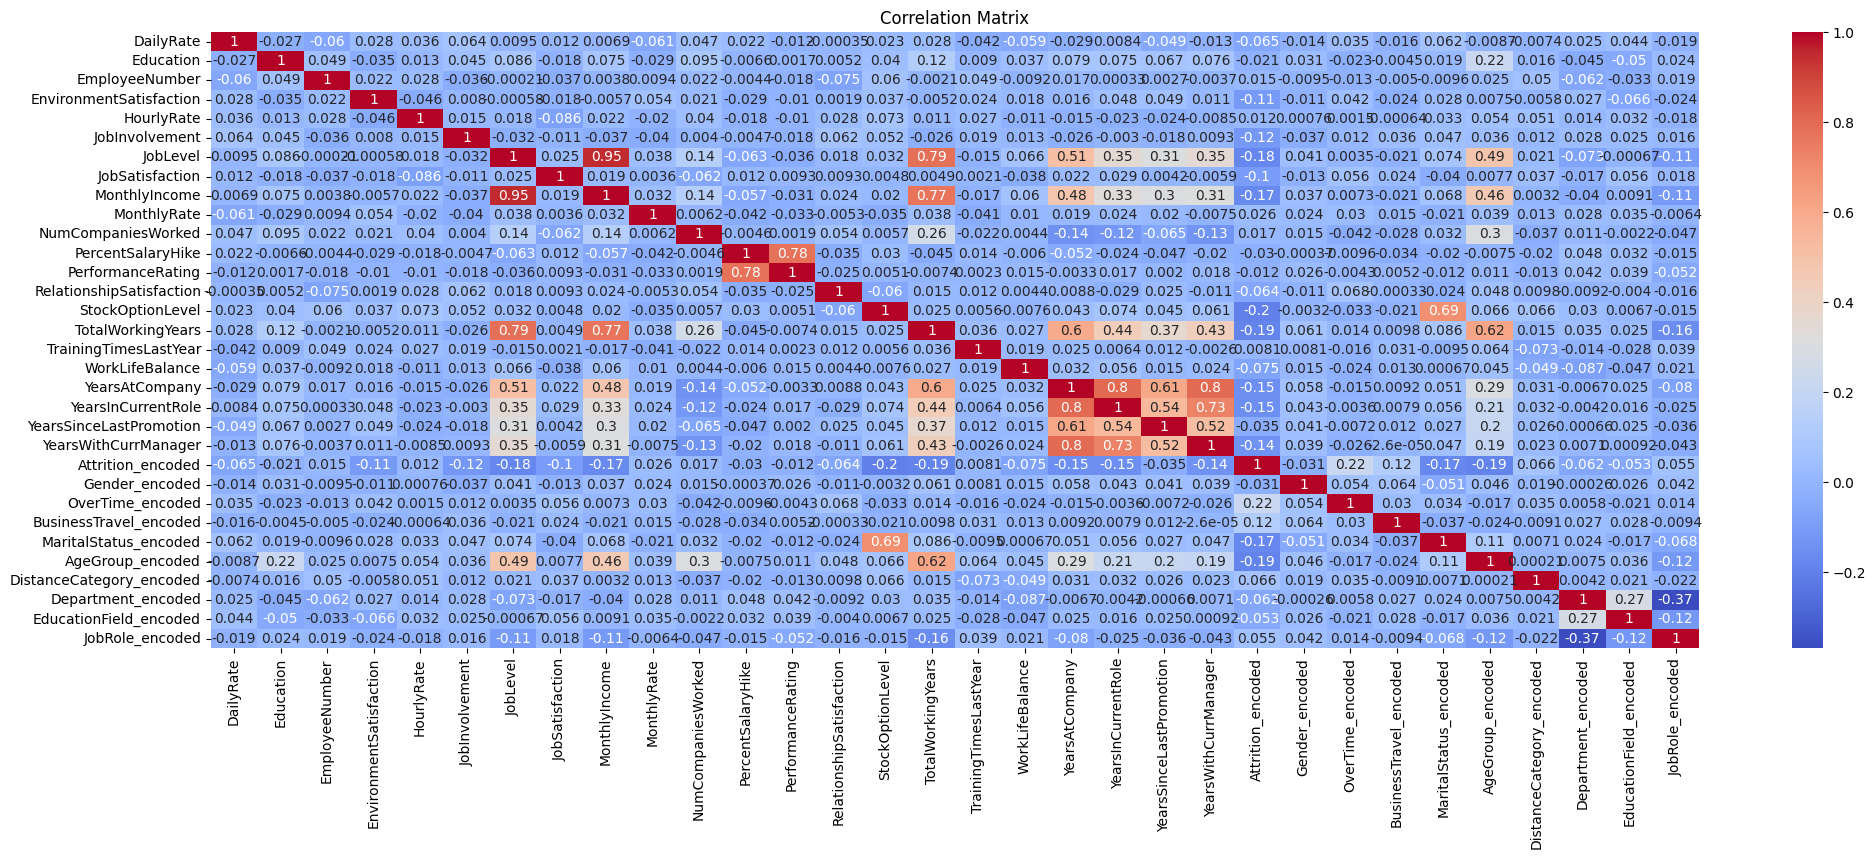

In [260]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(24, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix reveals the relationships between variables in the dataset. Variables with correlation coefficients close to +1 indicate a strong positive linear relationship, while those near -1 show a strong negative linear relationship.

Highly correlated variables (e.g., correlation coefficient > 0.95) such as **MonthlyIncome and JobLevel** list sp suggest a significant association, which may imply redundancy or shared influence in the dataset. Consideration of these relationships is crucial for model development to avoid issues like multicollinearity.

=> MonthlyIncome and JobLevel have a big correlation (0.95) so we can eliminate one of them .

In [261]:
data = data.drop(['MonthlyIncome'], axis=1)

###Univariate Analysis

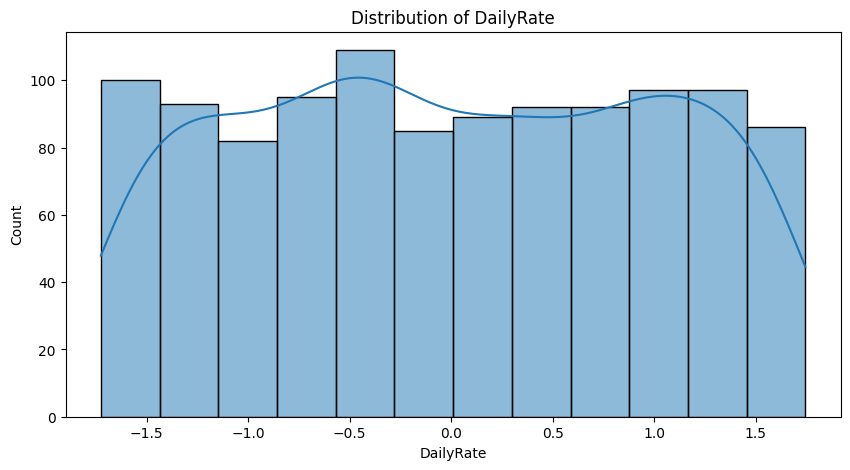

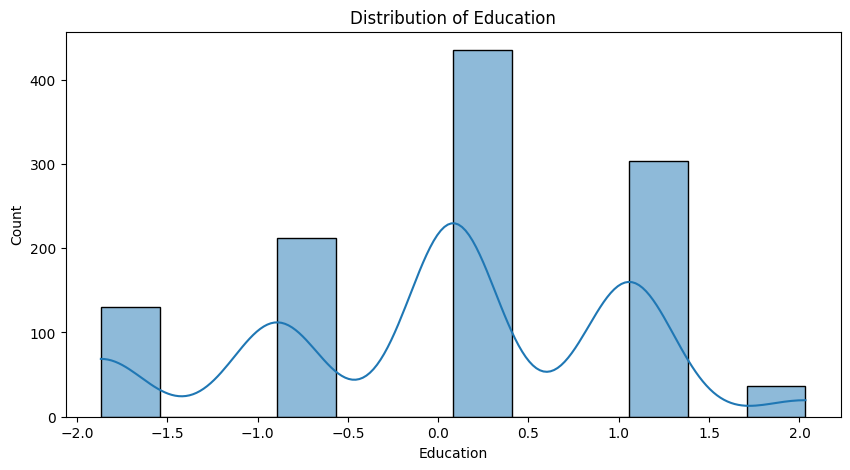

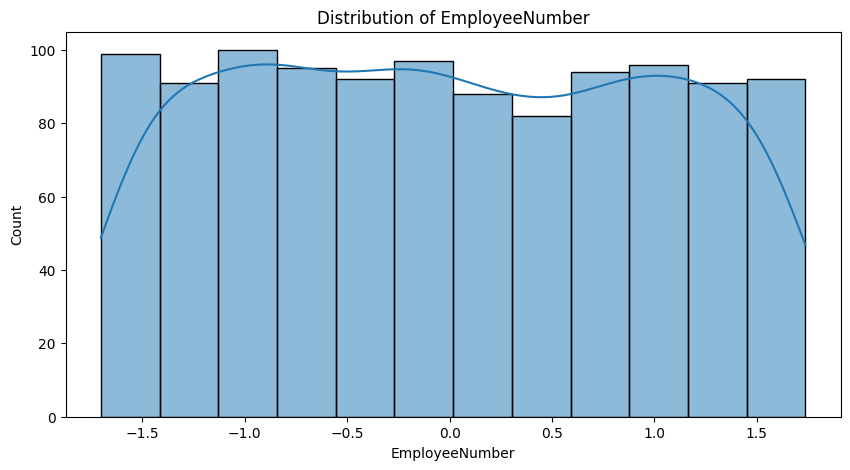

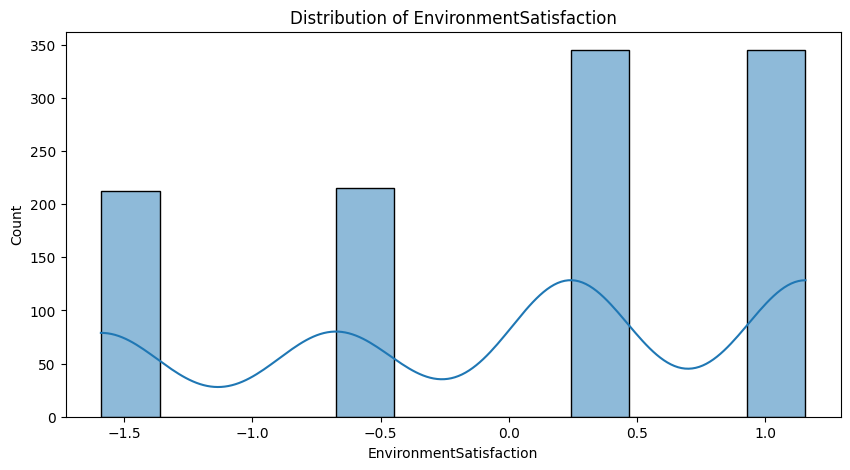

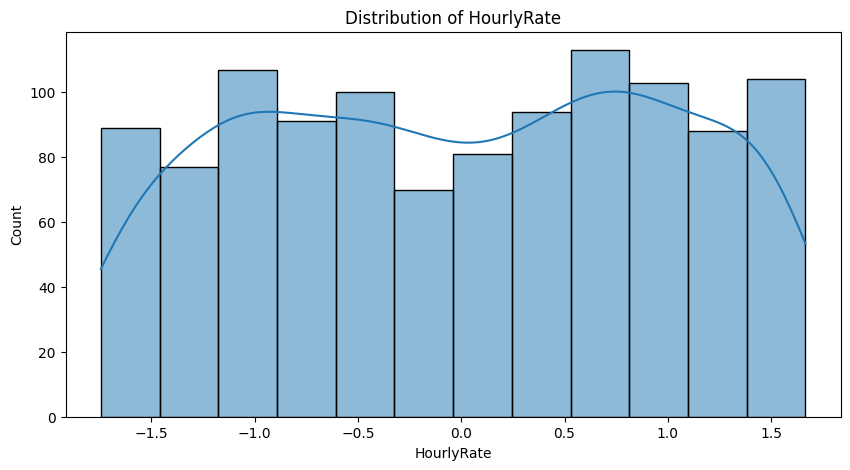

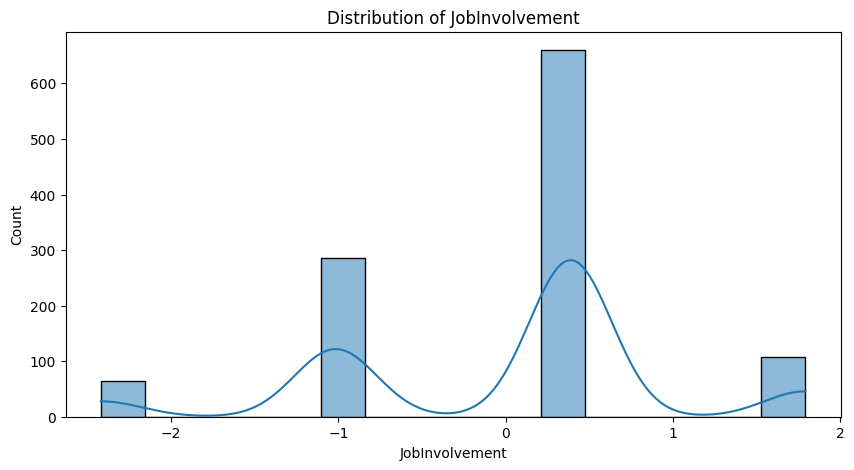

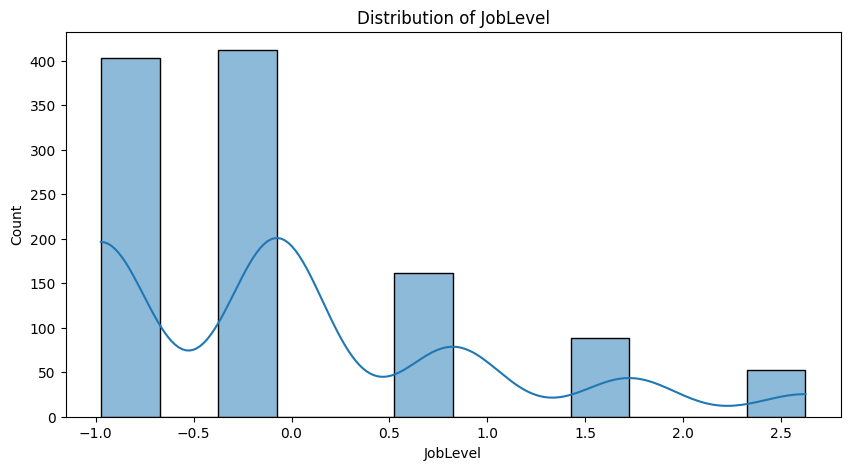

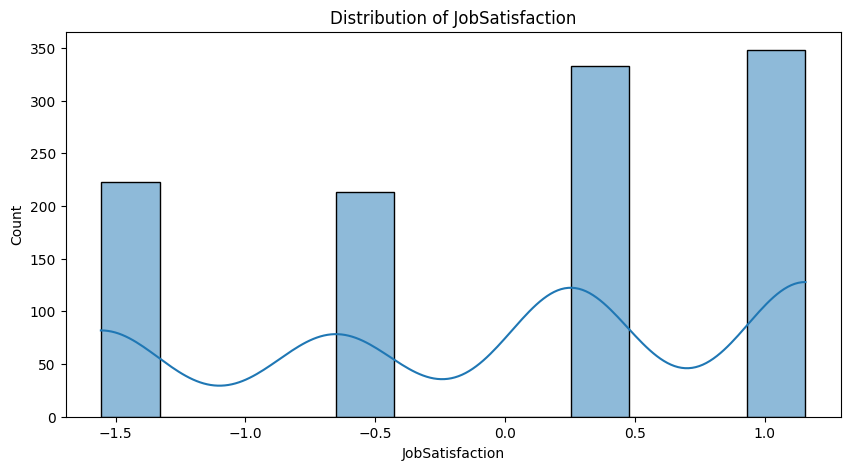

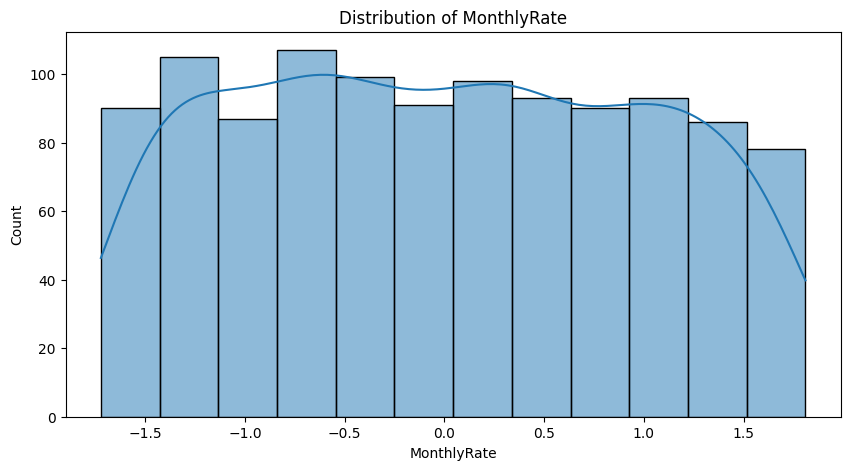

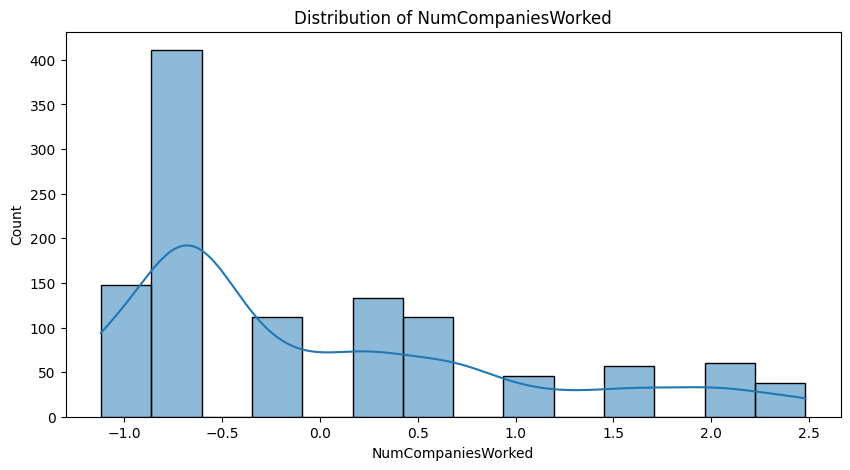

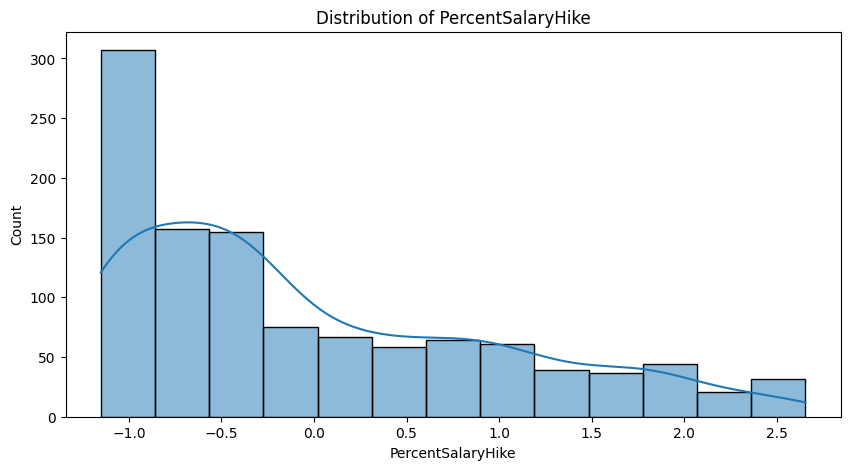

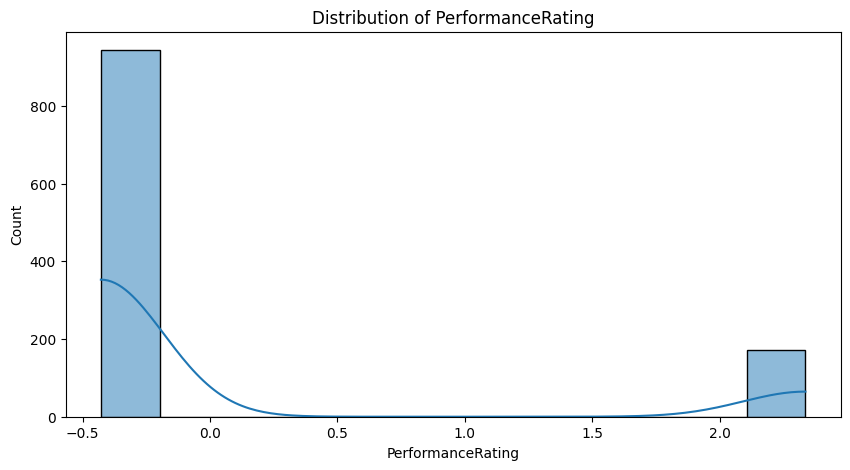

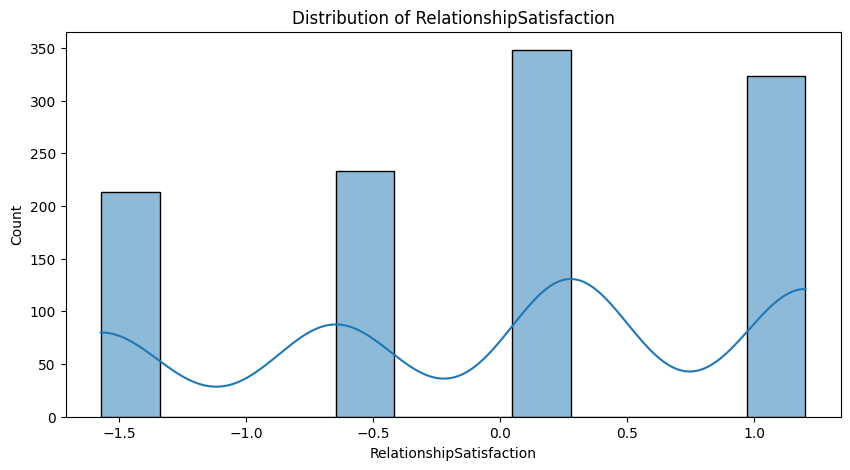

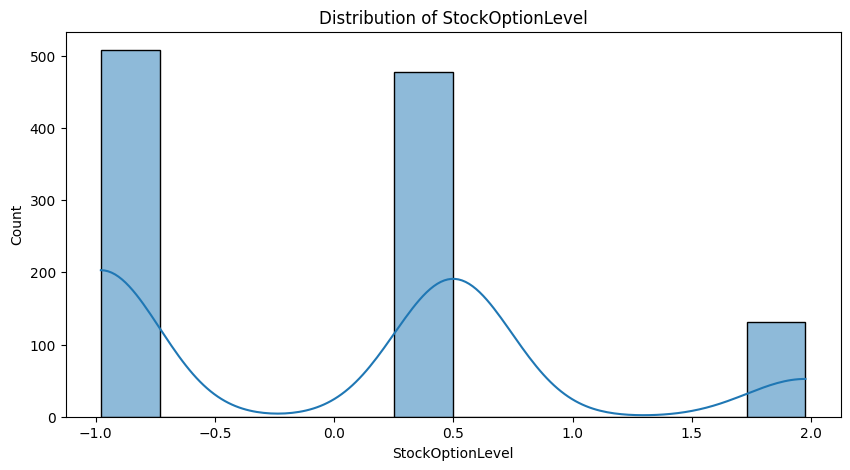

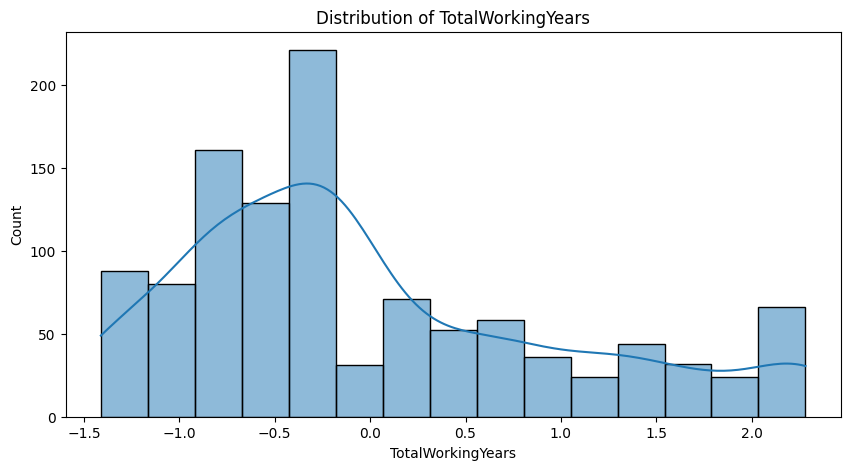

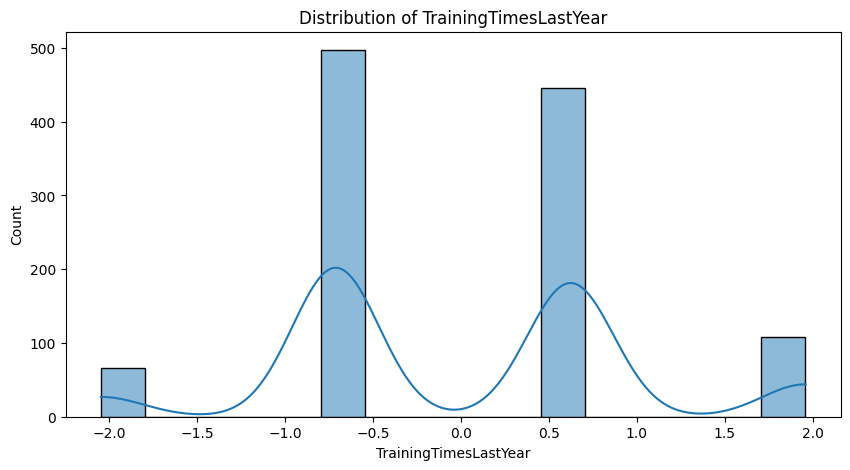

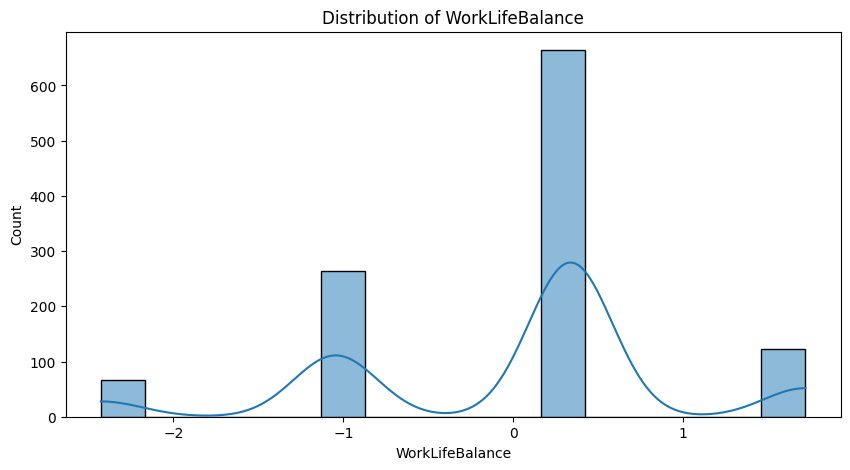

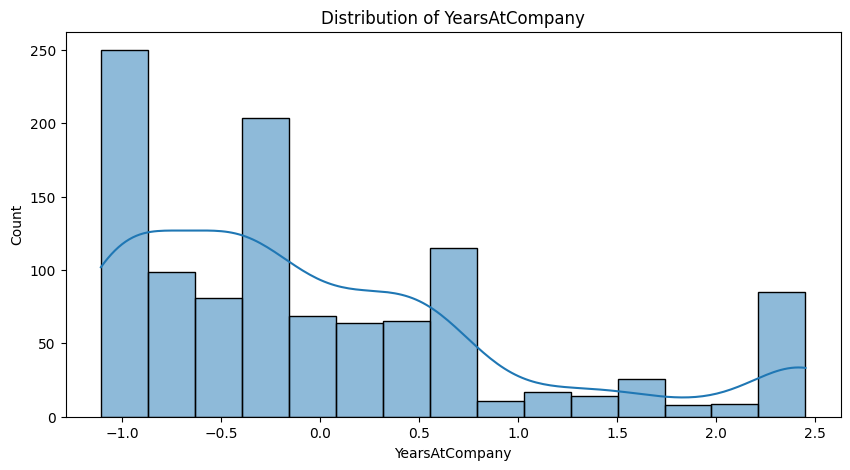

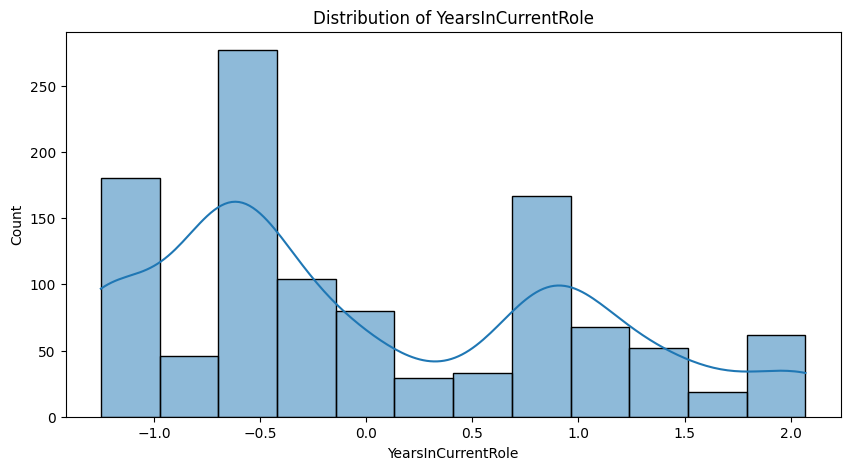

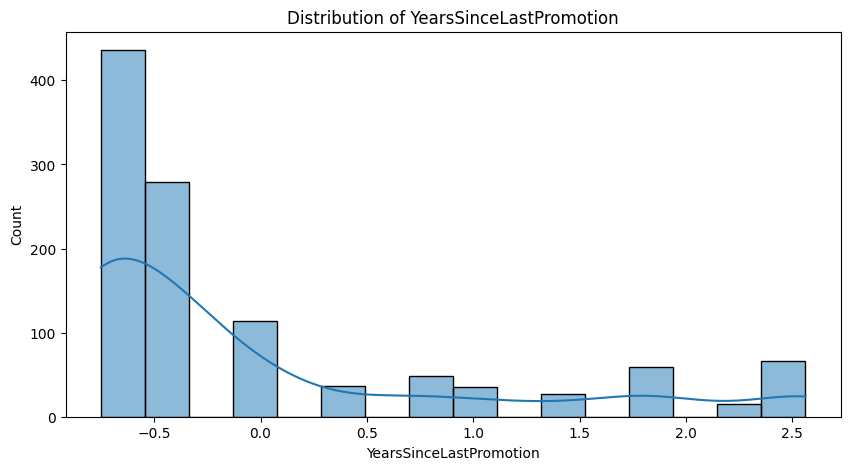

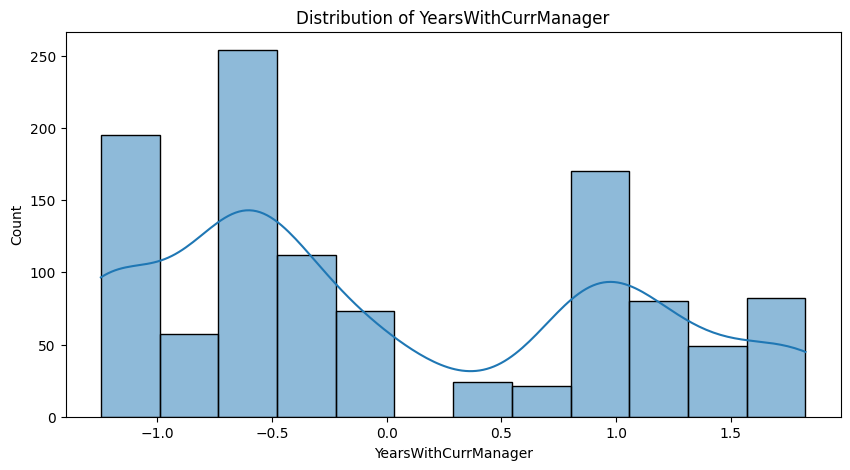

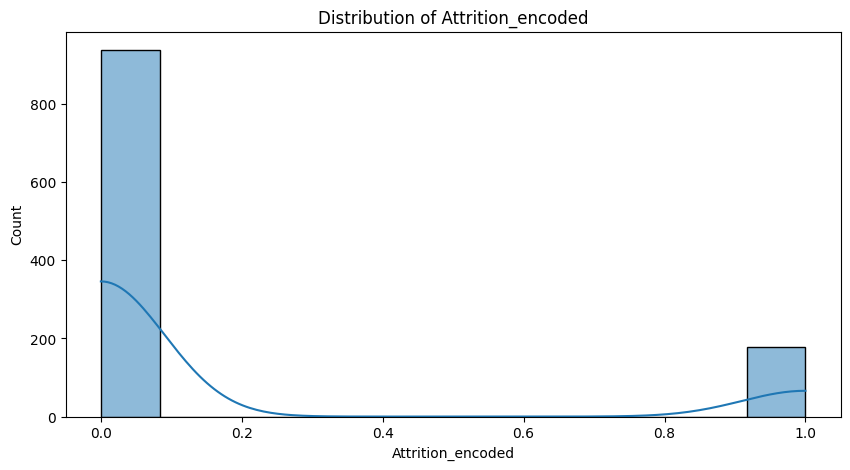

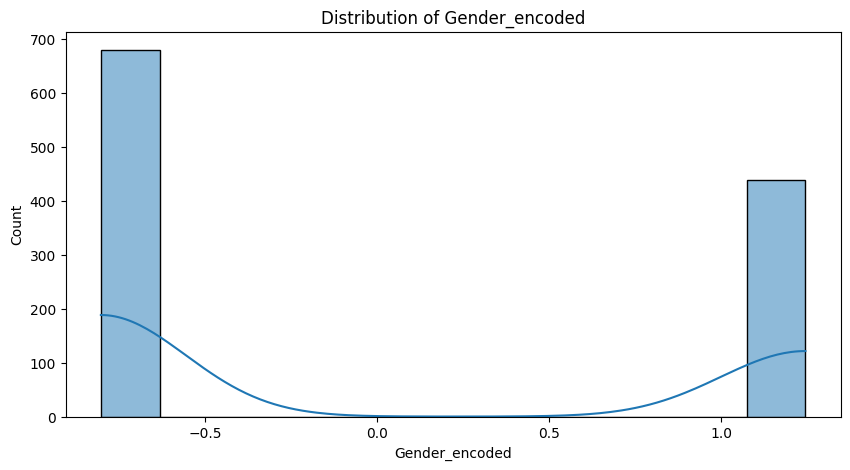

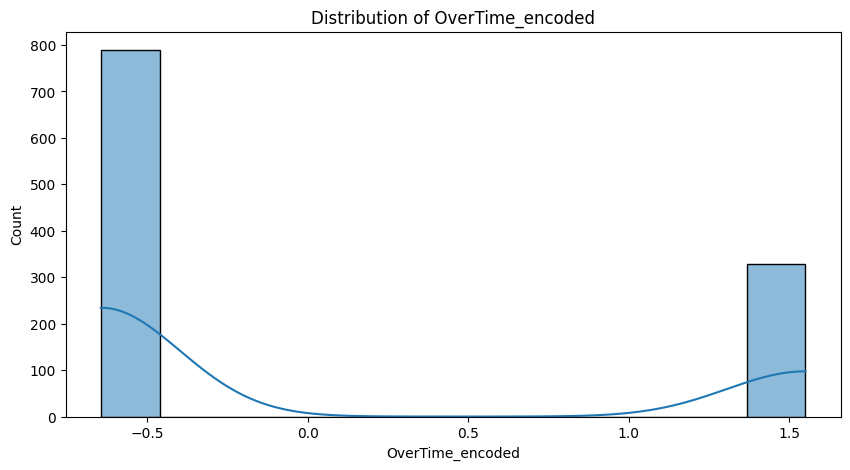

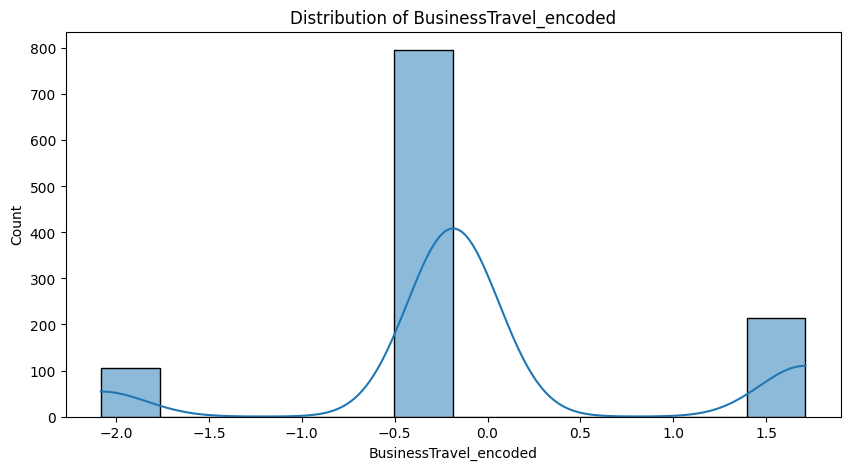

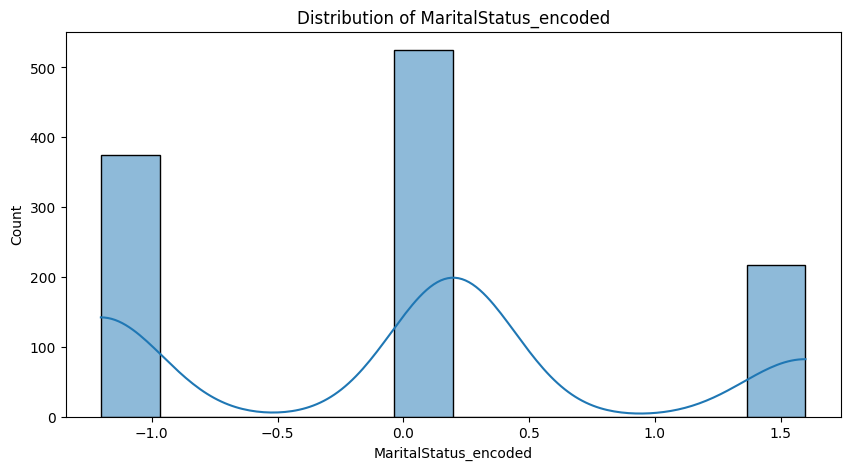

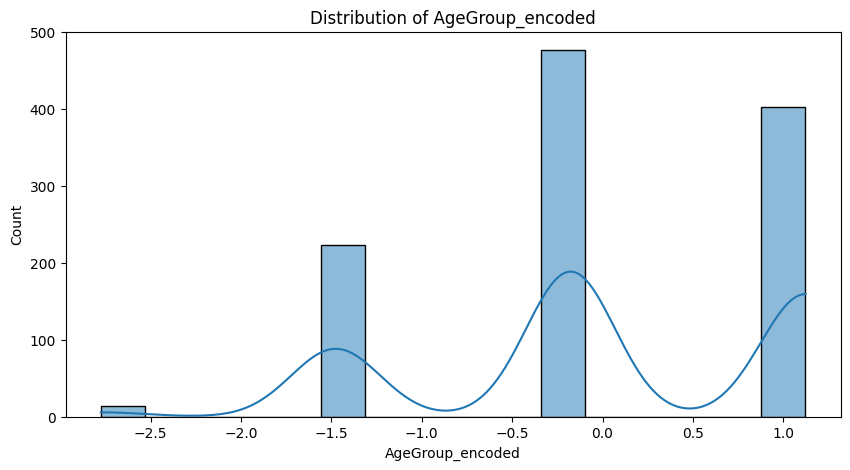

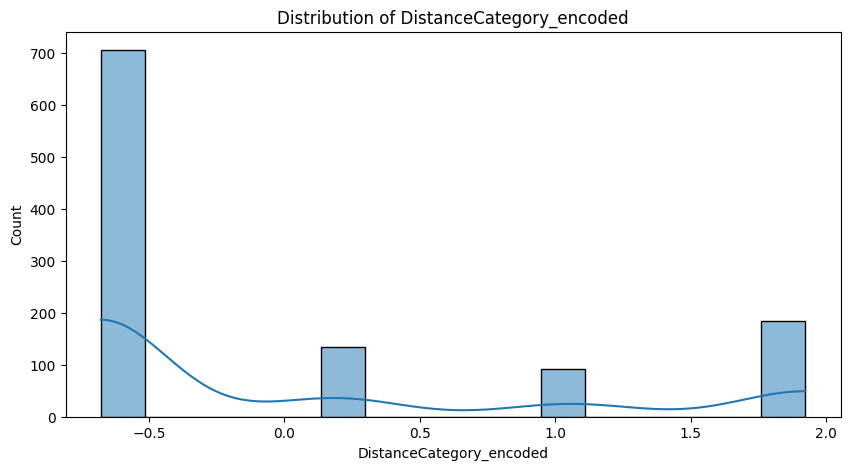

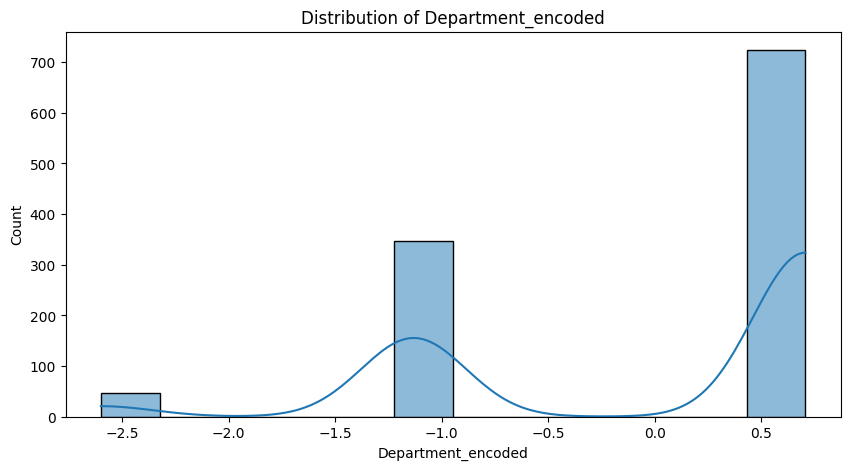

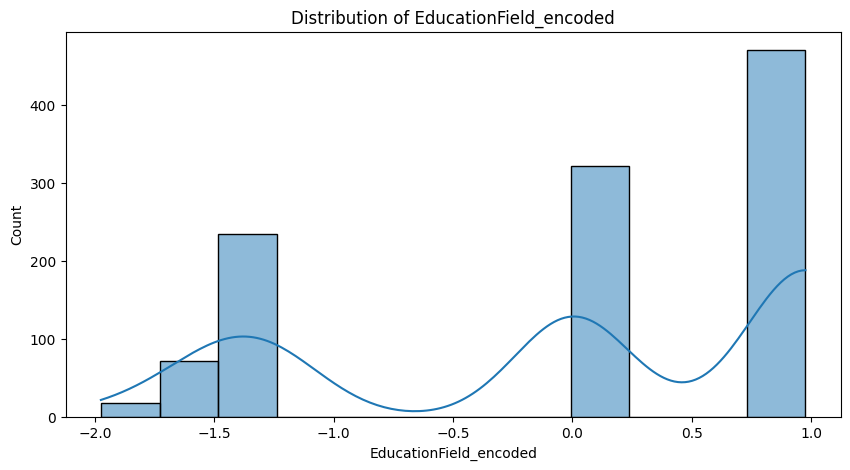

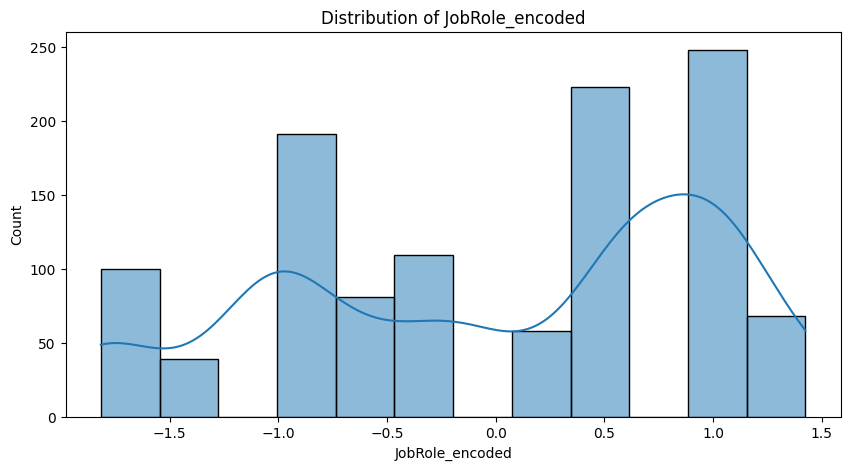

In [262]:
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

###MI (Mutual Information)

it will help us to detect any linear or non-linear association between each variable and the target variable.

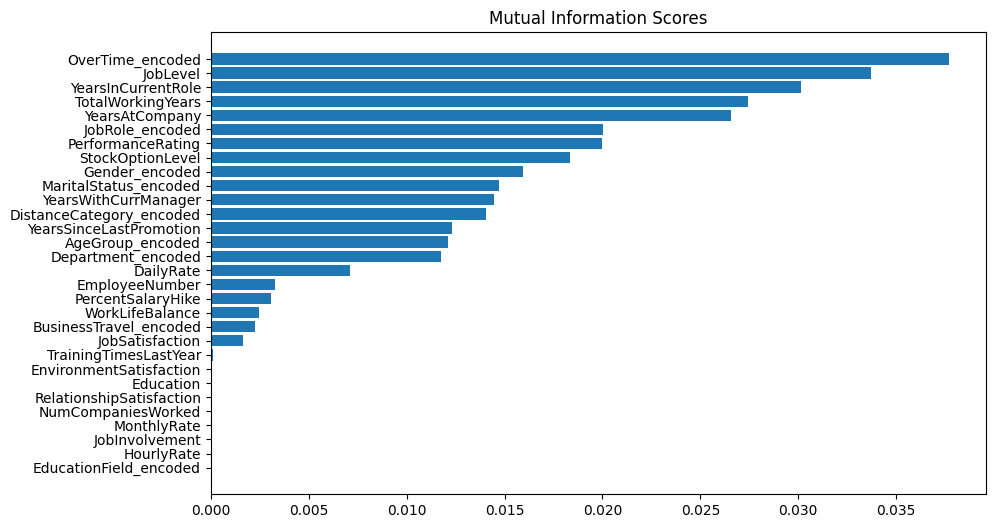

In [263]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

def make_mi_score_and_plot(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)

    # ploting the scores for each feature

    plt.figure(dpi=100, figsize=(10, 6))
    mi_scores = mi_scores.sort_values(ascending=True)
    width = np.arange(len(mi_scores))
    ticks = list(mi_scores.index)
    plt.barh(width, mi_scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    return mi_scores


X = data.copy()
y = X.pop("Attrition_encoded")

mi_scores = make_mi_score_and_plot(X, y)

selecting the features with non-zero MI scores

- X : features
- y : target

In [264]:

selected_features = mi_scores[mi_scores > 0.004].index

X = data[selected_features]
y = data['Attrition_encoded']
print(X.shape)
print(y.shape)

(1117, 16)
(1117,)


#Model Training and Evaluating

In [265]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, make_scorer


### Naive Bayes+

- train_sizes: An array specifying the sizes of the training sets to be used.
- train_scores: A 2D array where each row corresponds to the training scores of the model on different subsets of the training data (across different cross-validation folds).
- test_scores: A 2D array where each row corresponds to the cross-validation scores (validation scores) of the model on different subsets of the training data

 *  **Standard Deviation** (std) is a measure that
tells us how spread out the numbers in a dataset are from the mean (average).((std): It shows us how much those scores vary or spread out around the average score.)

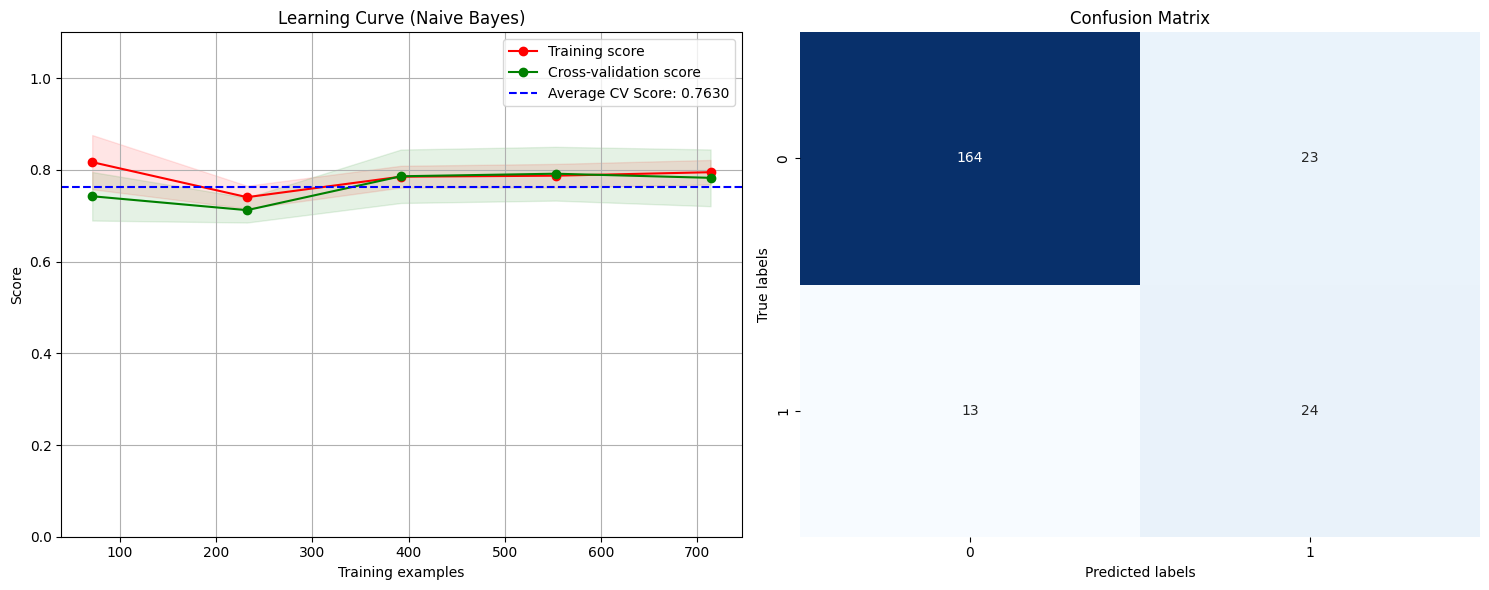

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       187
           1       0.51      0.65      0.57        37

    accuracy                           0.84       224
   macro avg       0.72      0.76      0.74       224
weighted avg       0.86      0.84      0.85       224



In [266]:
from sklearn.model_selection import StratifiedKFold, train_test_split, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Stratified KFold for cross-validation to maintain class distribution integrity
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Naive Bayes model
model = GaussianNB()

# Compute learning curve (cross validation of our modele and data)
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5),
)

# Compute mean and standard deviation of scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Fit the model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot learning curve and confusion matrix side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot learning curve
ax1.set_title("Learning Curve (Naive Bayes)")
ax1.set_xlabel("Training examples")
ax1.set_ylabel("Score")
ax1.invert_yaxis()
ax1.grid()
ax1.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
ax1.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
ax1.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax1.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax1.axhline(y=np.mean(test_scores_mean), color="b", linestyle="--", label=f"Average CV Score: {np.mean(test_scores_mean):.4f}")
ax1.set_ylim(0, 1.1)
ax1.legend(loc="best")

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax2)
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Confusion Matrix')

# Display the plots
plt.tight_layout()
plt.show()
print(classification_report(y_test, y_pred))

In [267]:
unique_counts = data['Attrition_encoded'].value_counts()

print("Unique value counts in 'Attrition_encoded' column:")
print(unique_counts)

Unique value counts in 'Attrition_encoded' column:
Attrition_encoded
0    938
1    179
Name: count, dtype: int64


###- Random Forest +++

**SMOTE** stands for **Synthetic Minority Over-sampling Technique** is used to balance class distribution in datasets that are imbalanced.
Instead of just duplicating existing examples from the minority class, SMOTE creates new, synthetic examples. It does this by picking two or more similar examples from the minority class and creating a new example that is a **combination** of them.

Unique value counts in target variable after SMOT:
Attrition_encoded
0    938
1    938
Name: count, dtype: int64


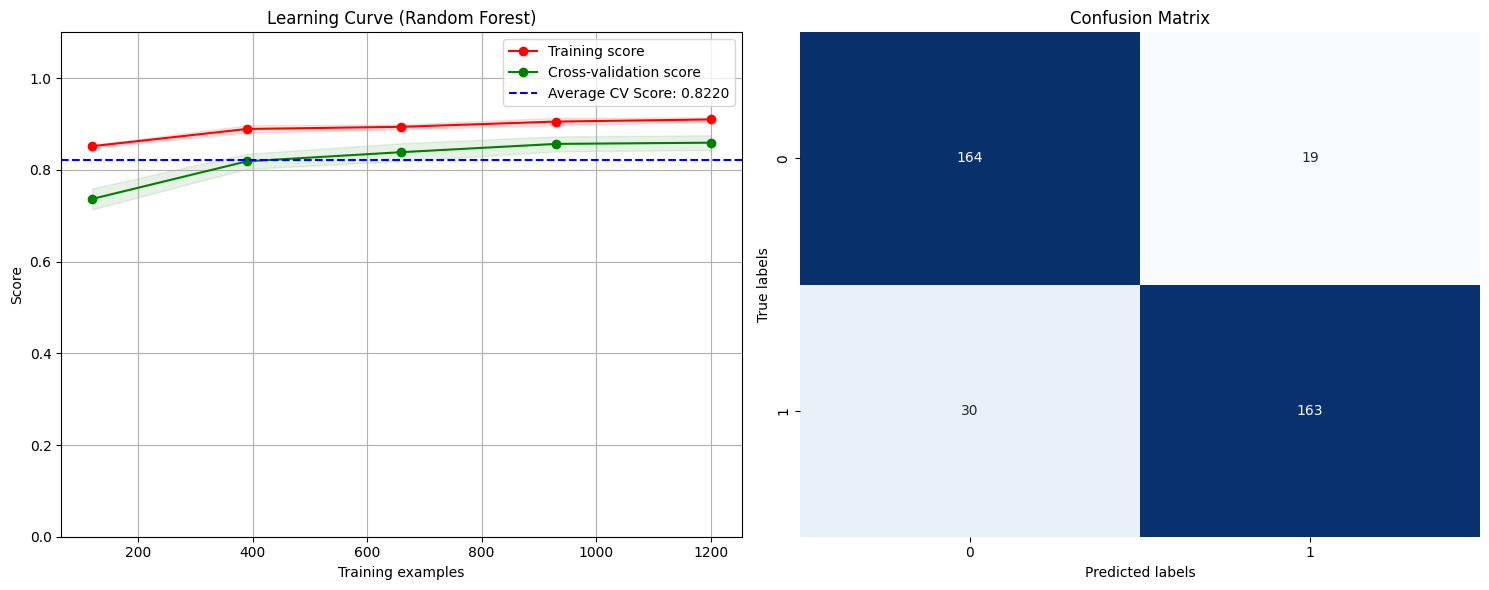

Best threshold: 0.5570878566032561
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       183
           1       0.90      0.84      0.87       193

    accuracy                           0.87       376
   macro avg       0.87      0.87      0.87       376
weighted avg       0.87      0.87      0.87       376



In [268]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve


# SMOTE for balancing classes
smote = SMOTE(random_state=42)
X_smot, y_smot = smote.fit_resample(X, y)

# showing unique values in target variable after SMOT
unique_counts = y_smot.value_counts()

print("Unique value counts in target variable after SMOT:")
print(unique_counts)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smot, y_smot, test_size=0.2, random_state=42)

# Instantiate RandomForestClassifier with adjusted parameters
model = RandomForestClassifier(n_estimators=300, min_samples_split=20, min_samples_leaf=10, max_depth=10, random_state=42)

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, n_jobs=-1, cv=5, train_sizes=np.linspace(.1, 1.0, 5),
)

# Fit the model on the entire training set
model.fit(X_train, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Find the best threshold for balancing precision and recall for class 1
best_threshold_index = np.argmax(precisions * recalls)
best_threshold = thresholds[best_threshold_index]

# Predict using the best threshold
y_pred_adjusted = (y_proba >= best_threshold).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_adjusted)

# Plot learning curve and confusion matrix side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot learning curve
ax1.set_title("Learning Curve (Random Forest)")
ax1.set_xlabel("Training examples")
ax1.set_ylabel("Score")
ax1.invert_yaxis()
ax1.grid()
ax1.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                 np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.1, color="r")
ax1.fill_between(train_sizes, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                 np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.1, color="g")
ax1.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
ax1.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
ax1.axhline(y=np.mean(test_scores), color="b", linestyle="--", label=f"Average CV Score: {np.mean(test_scores):.4f}")
ax1.set_ylim(0, 1.1)
ax1.legend(loc="best")

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax2)
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Confusion Matrix')

# Display the plots
plt.tight_layout()
plt.show()

# Print classification report
print(f"Best threshold: {best_threshold}")
print(classification_report(y_test, y_pred_adjusted))


###- LogisticRegression ++

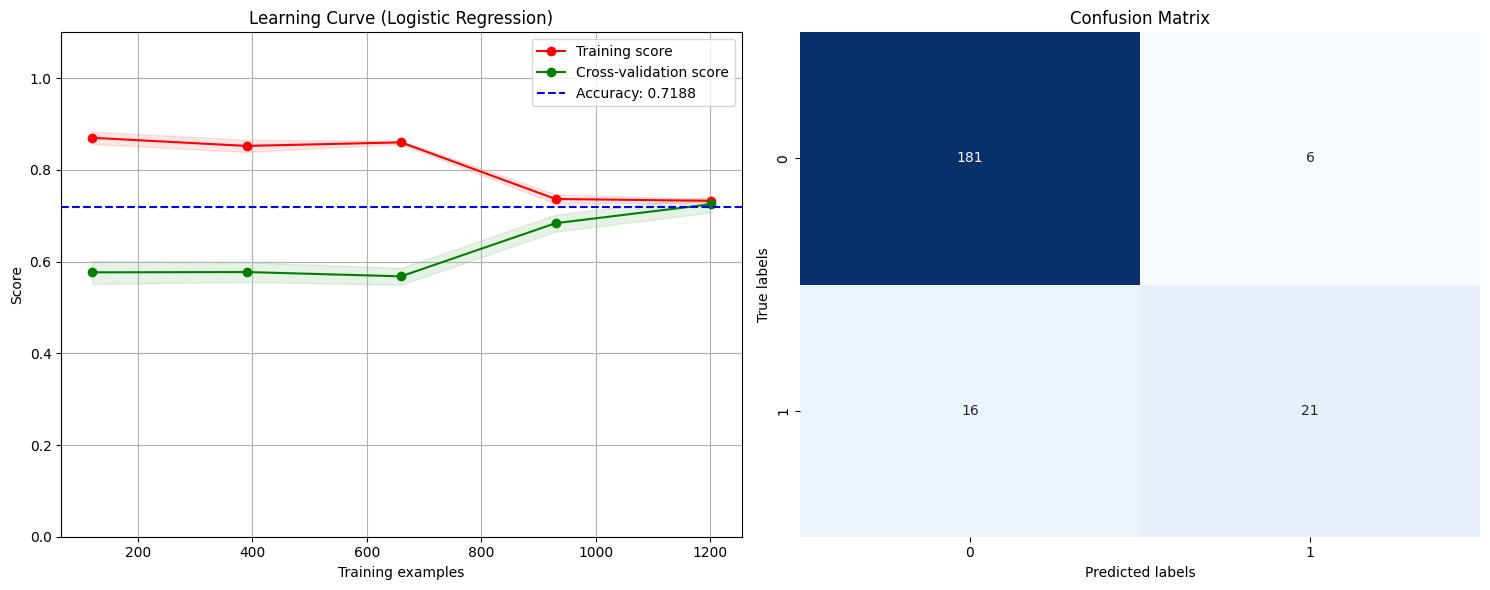

Best threshold: 0.7695048735740453
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       187
           1       0.78      0.57      0.66        37

    accuracy                           0.90       224
   macro avg       0.85      0.77      0.80       224
weighted avg       0.90      0.90      0.90       224



In [269]:
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from imblearn.over_sampling import SMOTE


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for balancing classes on training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


best_model = LogisticRegression(C= 10, penalty= 'l2', random_state=42)
best_model.fit(X_train_resampled, y_train_resampled)

# Predict probabilities and compute precision-recall curve on test set
y_proba = best_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Find the best threshold for balancing precision and recall for class 1
best_threshold_index = np.argmax(precisions * recalls)
best_threshold = thresholds[best_threshold_index]

# Predict using the best threshold
y_pred_adjusted = (y_proba >= best_threshold).astype(int)

# Compute learning curve
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_resampled, y_train_resampled, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), n_jobs=-1
)

# Compute metrics for plots
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
cm = confusion_matrix(y_test, y_pred_adjusted)

# Create subplots for learning curve and confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot learning curve
ax[0].set_title("Learning Curve (Logistic Regression)")
ax[0].set_xlabel("Training examples")
ax[0].set_ylabel("Score")
ax[0].grid()
ax[0].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
ax[0].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
ax[0].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax[0].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax[0].axhline(y=best_model.score(X_test, y_test), color="b", linestyle="--", label=f"Accuracy: {best_model.score(X_test, y_test):.4f}")
ax[0].set_ylim(0, 1.1)
ax[0].legend(loc="best")

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[1])
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')
ax[1].set_title('Confusion Matrix')

# Display the plots
plt.tight_layout()
plt.show()

# Print best threshold and classification report
print(f"Best threshold: {best_threshold}")
print(classification_report(y_test, y_pred_adjusted))


### Applying other algorithms

This step evaluates the performance of different machine learning models using cross-validation to compare their accuracy scores.

In [270]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Scoring metric
scoring = make_scorer(accuracy_score)

# Evaluating each model using cross-validation
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=scoring)
    print(f"{model_name} Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

Logistic Regression Accuracy: 0.8550 (+/- 0.0124)
Decision Tree Accuracy: 0.7494 (+/- 0.0270)
Random Forest Accuracy: 0.8442 (+/- 0.0071)
Support Vector Machine Accuracy: 0.8451 (+/- 0.0129)
Naive Bayes Accuracy: 0.7851 (+/- 0.0219)
